# Milestone 4

## Task 3

### Dataset exploration

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


2025-12-31 02:08:09.980693: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-31 02:08:09.981313: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-31 02:08:10.051243: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-31 02:08:14.313130: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


The keras function loads the MNIST dataset, already split into training and testing data.
The output that we receive shows that the training data exists of 60'000 images each being 28x28 pixel and the testing data consists of 10'000 with equal dimensions.

Both, testing and training data contain exactly one label for each image.
The images show no channel because all the images are grayscaled. Since we trained our model on normalized data and with a clear channel, this data transformation will be here necessary too.
The pixel values are normalized to the range [0,1]. In addition, an explicit channel dimension is added to the grayscale images, resulting in an input shape of (60000, 28, 28, 1).

In [3]:
x_train = x_train / 255.0
x_train = x_train[..., np.newaxis]

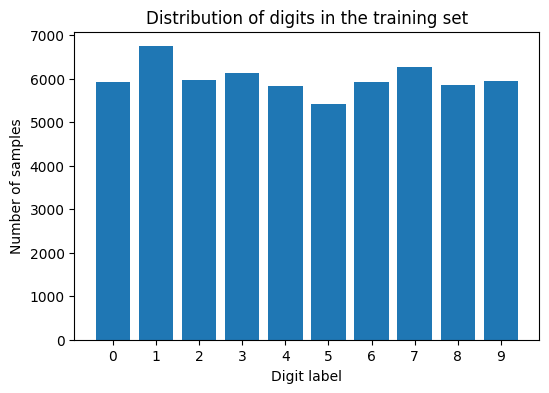

In [4]:
# Count occurrences of each digit
unique_labels, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(6, 4))
plt.bar(unique_labels, counts)
plt.xlabel("Digit label")
plt.ylabel("Number of samples")
plt.title("Distribution of digits in the training set")
plt.xticks(unique_labels)
plt.show()

The distribution of labels in the training set is approximately uniform. This indicates that each digit class is represented by a similar number of samples.


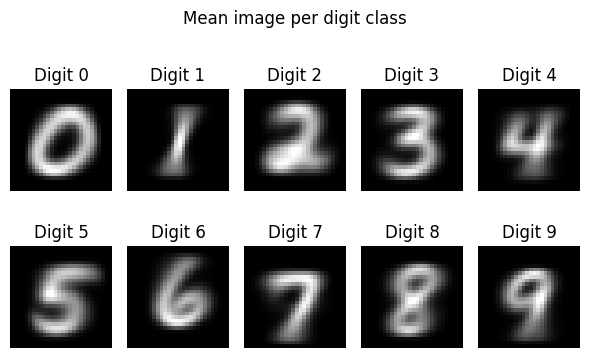

In [5]:
plt.figure(figsize=(6, 4))

for digit in range(10):
    mean_digit = np.mean(x_train[y_train == digit], axis=0)
    plt.subplot(2, 5, digit + 1)
    plt.imshow(mean_digit, cmap="gray")
    plt.title(f"Digit {digit}")
    plt.axis("off")

plt.suptitle("Mean image per digit class")
plt.tight_layout()
plt.show()




This graph shows how the average image for each digit class looks. S the typical way the numbers were written.
For each class of digits, the mean pixel distribution is calculated. So each pixel in the image repesents the average pixel intensity for that number.
This works because every image has a grid in which each pixel is represented by a number between 0 (black) and 255 (white). Values inbetween are a shade of grey.
So the higher the average (so the more white and/or more often this pixel is in each image) then more white the pixel.


### Output analysis
To analyze the output data from one of the runs, the predictions first need to be downloaded from W&B. To do so, first pick which run you want to analyse and adjust the part of the link behind the last backslash `run = api.run("dsta-2025/milestone4_modeltrainer/runs/xxxx")`

Then, follow the commands to log into W&B.


In [2]:
import wandb

wandb.login()

api = wandb.Api()
run = api.run("dsta-2025/milestone4_modeltrainer/runs/803djk5d")

# Datei herunterladen
file = run.file("predictions.csv")
file.download(replace=True)

print("Done")


wandb: Currently logged in as: rekla (dsta-2025) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Done


Now the csv-file is stored as a data frame:

In [3]:
import pandas as pd
df = pd.read_csv("predictions.csv")
df.head()

,true_label,predicted_label
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


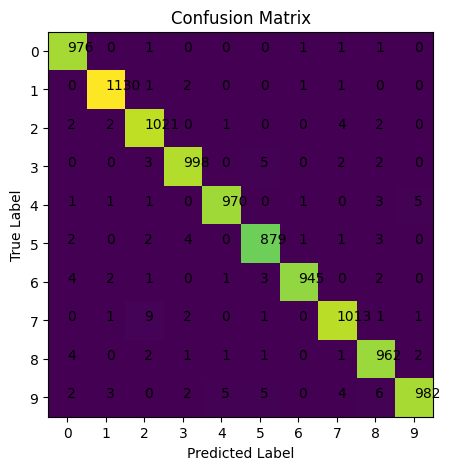

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(df["true_label"], df["predicted_label"])

# plotting the confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.xticks(range(10))
plt.yticks(range(10))

for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j])

plt.show()



In the visualization of the confusion matrix each field represents how often a digit was predicted depending on the original label. The matrix could potentially help to identify numbers that the model often gets wrong or if keeps mixing up some digits.
It can be seen for example that the model more often then usual classifies the 7 as a 2.